# MTpy Example 10

## Phase Tensor Pseudosections

A pseudosection plot distance on the x-axis and period on the y-axis.  Phase tensor ellipses are plotted for each station at each period measured.  This provides a plot that is an proxy for structures at depth. The ellipses and induction vectors are plotted in map view, so up is North and to the right is East.  

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib widget

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
%%time
with MTCollection() as mc:
    mc.open_collection(Path(r"../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5"))
    mt_data = mc.to_mt_data()
    mt_data.utm_crs = 28353

23:11:14T09:23:32 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5
CPU times: user 8.29 s, sys: 197 ms, total: 8.49 s
Wall time: 9.46 s


In [3]:
%%time
profile_mt_data = mt_data.get_profile(129, -27, 134, -27, 8000)

CPU times: user 39.6 s, sys: 789 ms, total: 40.4 s
Wall time: 40.4 s


## Plot Phase Tensor Pseudosection  

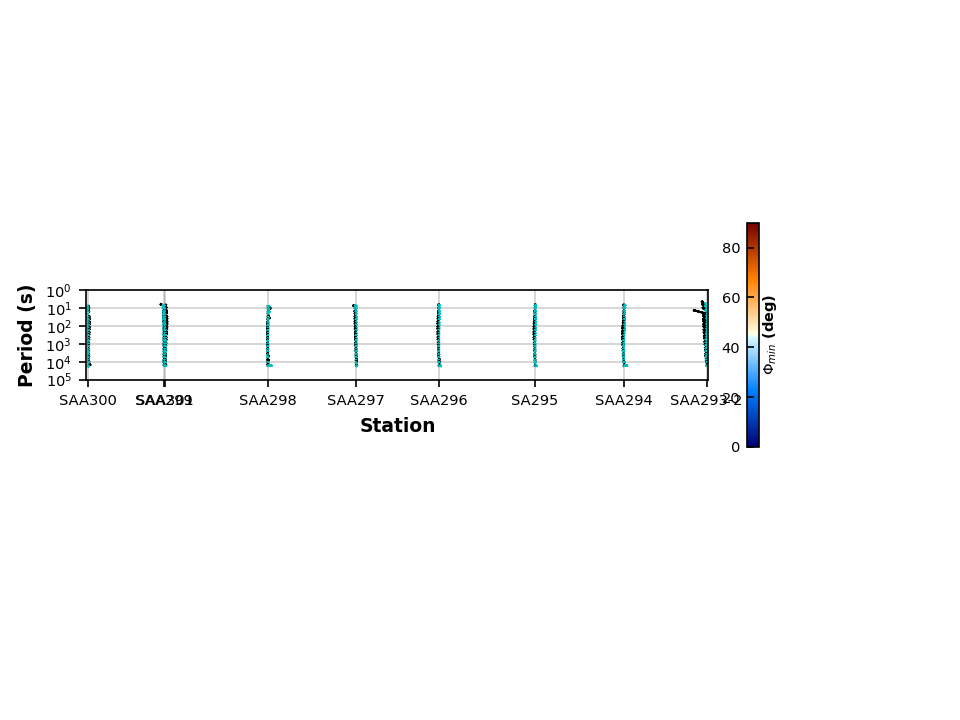

In [4]:
plot_pt_pseudosection = profile_mt_data.plot_phase_tensor_pseudosection( 
    plot_tipper="yri", 
    fig_num=2, 
    profile_reverse=False,
    y_limits=(10**5, 1),
)

### Adjust Plot Parameters

Adjust some plot parameters to make it look nice.

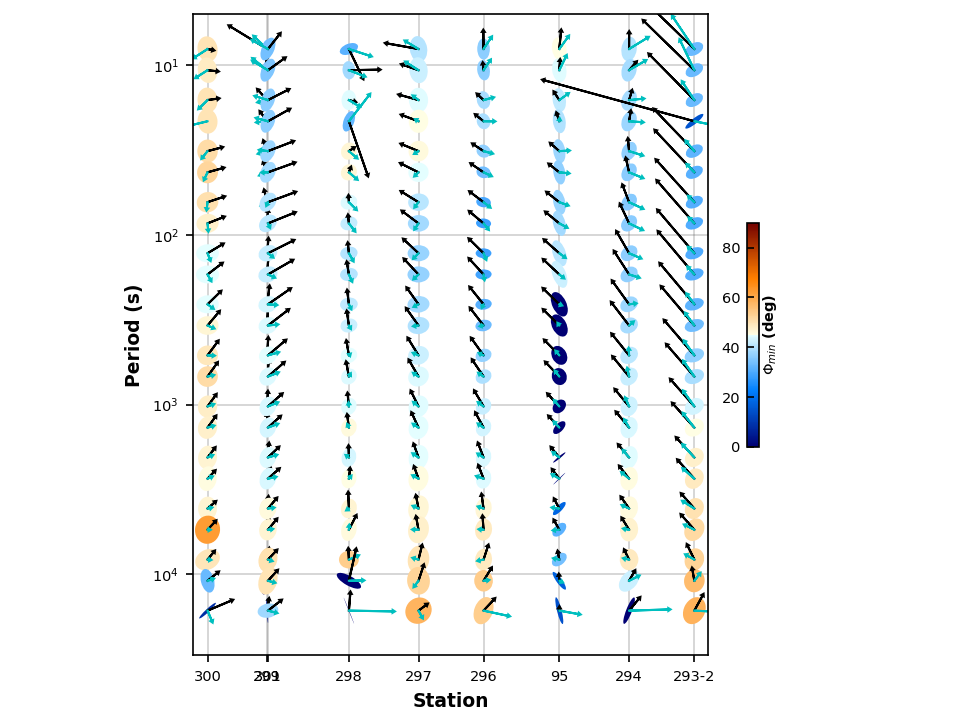

In [5]:
# the stretch in the x direction
plot_pt_pseudosection.x_stretch = .25

# the stretch in the y direction
plot_pt_pseudosection.y_stretch = 30000

# ellipse properties
plot_pt_pseudosection.ellipse_size = 5000

# arrow properties
plot_pt_pseudosection.arrow_lw = .5
plot_pt_pseudosection.arrow_size = 15000
plot_pt_pseudosection.arrow_head_width = 500

# station name index
plot_pt_pseudosection.station_id = [3, None]

# y limits for the period range
plot_pt_pseudosection.y_limits=(30000, 5)

# need a new figure number from the main, otherwise it updates that plot
plot_pt_pseudosection.fig_num = 3
plot_pt_pseudosection.redraw_plot()